<a href="https://colab.research.google.com/github/catlaughing/bangkitProject1/blob/master/Bangkit_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and Import Library

In [49]:
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## Read and Inspect (a little) Dataset

In [0]:
df_math = pd.read_csv('/content/student-mat.csv',delimiter=';')

In [10]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [11]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
df_math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [15]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [0]:
X, y = df_math.drop(['G3'],axis=1), df_math['G3'] ## Split the features and label

In [0]:
cat_col = X.drop(['G1','G2','absences'],axis=1).columns ## Take all the category column
for col in cat_col:
  X[col] = X[col].astype('category') ## Change their type into categorical so that we can use pd.get_dummies

In [0]:
X = pd.get_dummies(X) ## One Hot Encoding all categorical features

In [0]:
num_col = ['G1','G2','absences'] ## Take all numerical columns
for col in num_col:
  sc = StandardScaler()
  X[col] =sc.fit_transform(X[col].values.reshape(-1,1)) ## Standardize them


In [35]:
X.head() ## New shape of our dataframe

,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,0.036424,-1.782467,-1.254791,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,-0.213796,-1.782467,-1.520979,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.536865,-1.179147,-0.722415,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,-0.464016,1.234133,0.874715,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,-0.213796,-1.480807,-0.190038,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.661975,-0.575827,-0.456226,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
391,-0.338906,0.932473,1.407091,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
392,-0.338906,-0.274167,-0.722415,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
393,-0.714236,0.027493,0.342338,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


## Build The Model

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(lr=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [75]:
EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:135.8721,  mae:10.7424,  mse:137.3626,  val_loss:126.7073,  val_mae:10.4496,  val_mse:126.2554,  
....................................................................................................
Epoch: 100, loss:2.9971,  mae:1.2897,  mse:3.0569,  val_loss:4.5453,  val_mae:1.5132,  val_mse:4.4496,  
....................................................................................................
Epoch: 200, loss:2.2794,  mae:1.0819,  mse:2.2605,  val_loss:5.4131,  val_mae:1.6317,  val_mse:5.3208,  
....................................................................................................
Epoch: 300, loss:1.5830,  mae:0.9232,  mse:1.6544,  val_loss:6.8225,  val_mae:1.8468,  val_mse:6.7491,  
....................................................................................................
Epoch: 400, loss:0.8464,  mae:0.6880,  mse:0.8894,  val_loss:8.2512,  val_mae:2.0401,  val_mse:8.1900,  
..............................................................

In [76]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.012535,0.084623,0.012841,12.678942,2.488625,12.721563,995
996,0.013985,0.083251,0.012660,12.605230,2.484797,12.646488,996
997,0.012622,0.082550,0.012408,12.676710,2.489194,12.720044,997
998,0.012370,0.082782,0.012340,12.730381,2.493565,12.773007,998
999,0.013442,0.086192,0.013277,12.650536,2.485948,12.694900,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'MAE [G3]')

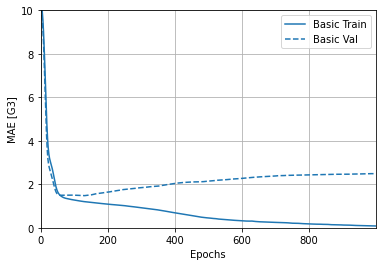

In [78]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [G3]')

Text(0, 0.5, 'MSE [G2^2]')

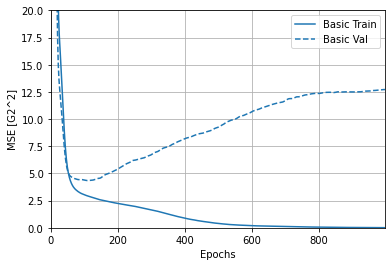

In [79]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [G2^2]')

We can see that after 200 epoch our model starting to overfitting the train data, so let's use earlystopping so that we can stop the training process before we overfit

In [80]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

early_history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:135.2093,  mae:10.6052,  mse:133.1048,  val_loss:123.4977,  val_mae:10.3584,  val_mse:123.0582,  
....................................................................................................
Epoch: 100, loss:1.7284,  mae:0.9693,  mse:1.7737,  val_loss:4.9294,  val_mae:1.5121,  val_mse:4.7855,  
.....................................................

Text(0, 0.5, 'MAE [G3]')

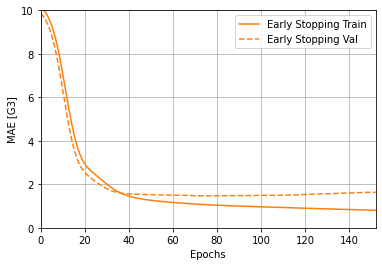

In [81]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [G3]')

With eraly stopping we only finished 140 epoch but we got a better result than when we don't use it

## Prediction

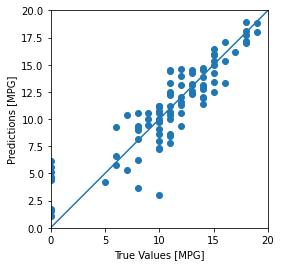

In [82]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [85]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} G3 Score".format(mae))

4/4 - 0s - loss: 4.5521 - mae: 1.5696 - mse: 4.4492
Testing set Mean Abs Error:  1.57 G3 Score


We can see thet our model already done a good job
